In [1]:
%load_ext rpy2.ipython

In [249]:
#!gist -p Test_grid_cc_using_rho1_and_rho1_fromTADApaper_genesetFMRP.ipynb

In [250]:
!gist -u https://gist.github.com/fc1d8dc44c4f11189744 Test_grid_cc_using_rho1_and_rho1_fromTADApaper_genesetFMRP.ipynb

https://gist.github.com/fc1d8dc44c4f11189744


##LoF

In [266]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.lof.combinedData.genesetFMRP.txt")
#d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.No.cc.geneset.FMRP.lof.txt")



cLLK <- dim(d.cc.lof)[2]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [267]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 623160      8
     V1  V2  V3   V4    V5  V6   V7       V8
1: 0.08 1.5 2.2 1.31 10000 0.5 5000 2250.805
2: 0.08 1.5 2.2 1.41 10000 0.5 5000 2248.239
3: 0.08 1.5 2.2 1.51 10000 0.5 5000 2245.774
4: 0.08 1.5 2.2 1.61 10000 0.5 5000 2243.406
5: 0.08 1.5 2.2 1.71 10000 0.5 5000 2241.130
6: 0.08 1.7 2.2 1.31 10000 0.5 5000 2249.274


In [268]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

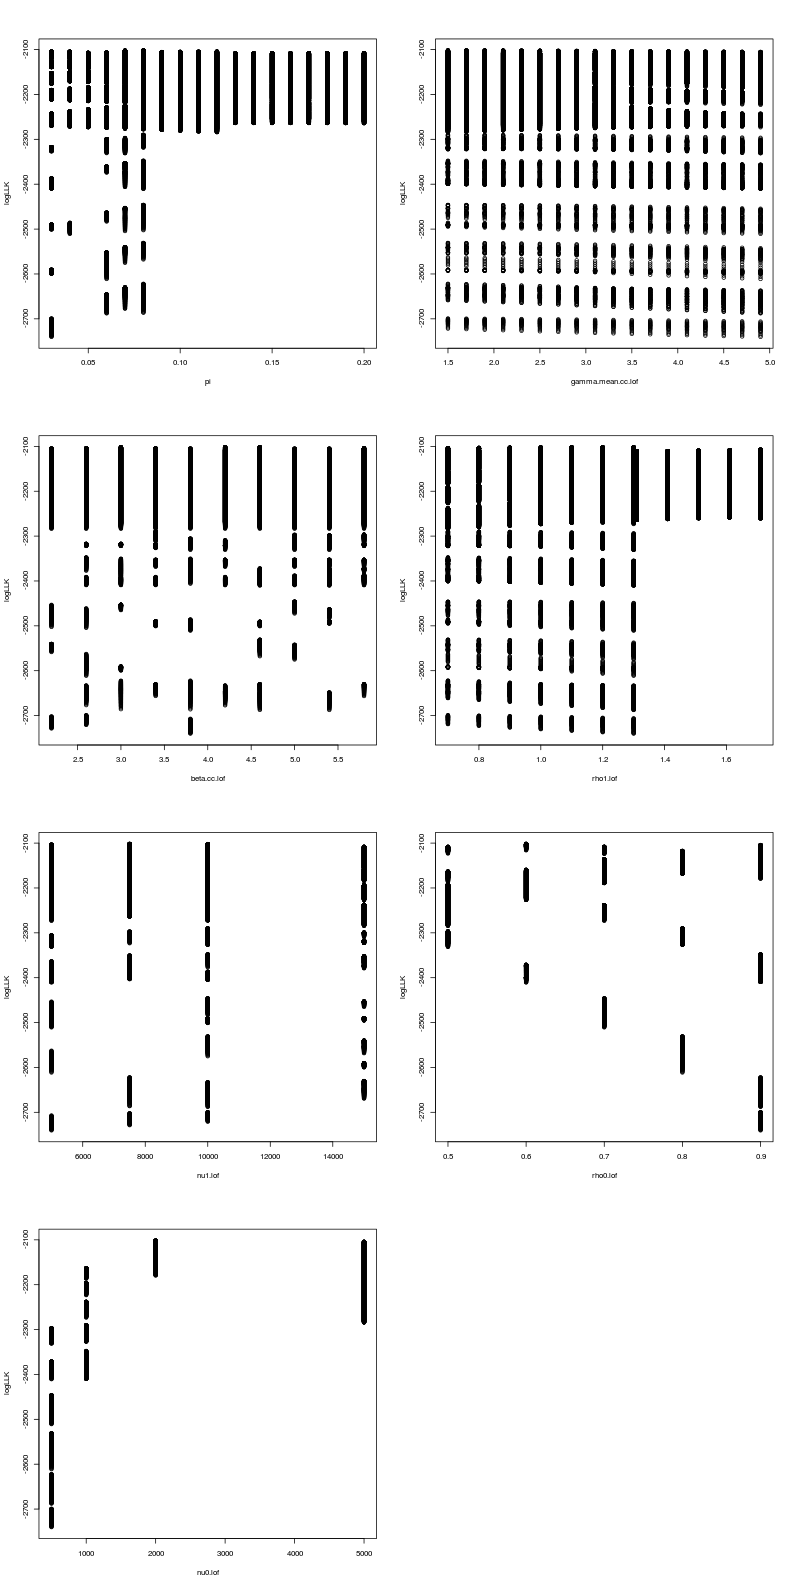

In [269]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

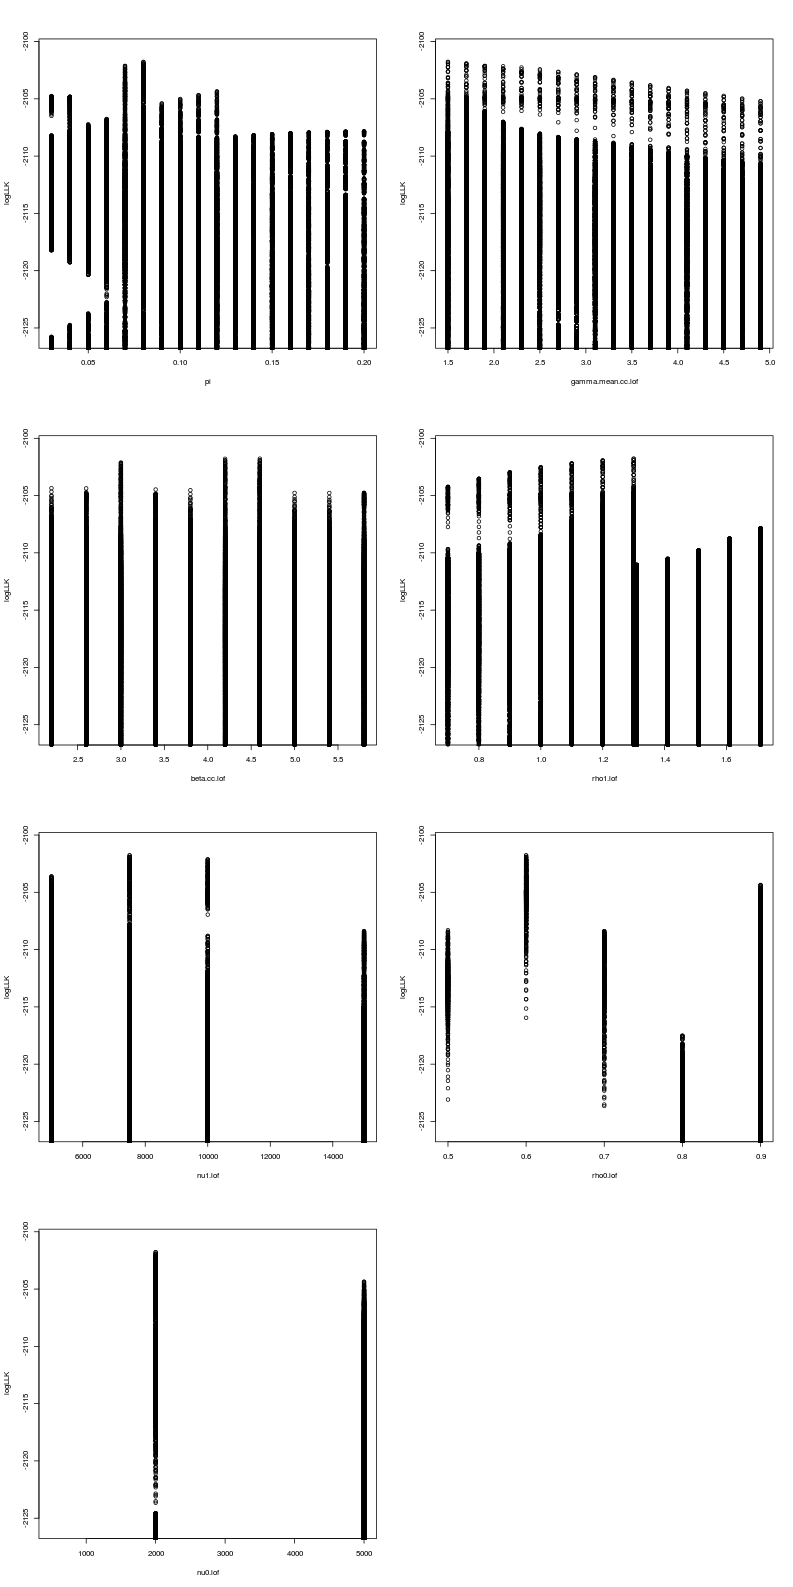

In [270]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 25
d.cc.lof.1 <- d.cc.lof[V6>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [271]:
%%R
d.cc.lof.1[order(V8)]

          V1  V2  V3  V4   V5  V6   V7       V8
     1: 0.08 1.5 4.6 1.3 7500 0.6 2000 2101.772
     2: 0.08 1.5 4.2 1.3 7500 0.6 2000 2101.786
     3: 0.08 1.7 4.6 1.3 7500 0.6 2000 2101.916
     4: 0.08 1.7 4.2 1.3 7500 0.6 2000 2101.924
     5: 0.08 1.5 4.6 1.2 7500 0.6 2000 2101.926
    ---                                        
623156: 0.03 4.9 3.8 1.2 5000 0.9  500 2736.963
623157: 0.03 4.3 3.8 1.3 5000 0.9  500 2737.347
623158: 0.03 4.5 3.8 1.3 5000 0.9  500 2738.277
623159: 0.03 4.7 3.8 1.3 5000 0.9  500 2739.181
623160: 0.03 4.9 3.8 1.3 5000 0.9  500 2740.062


###Set limit for the proportion of protective variants and the frequency of variants

In [272]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.017]
#d.cc.lof.1 <- d.cc.lof
d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]

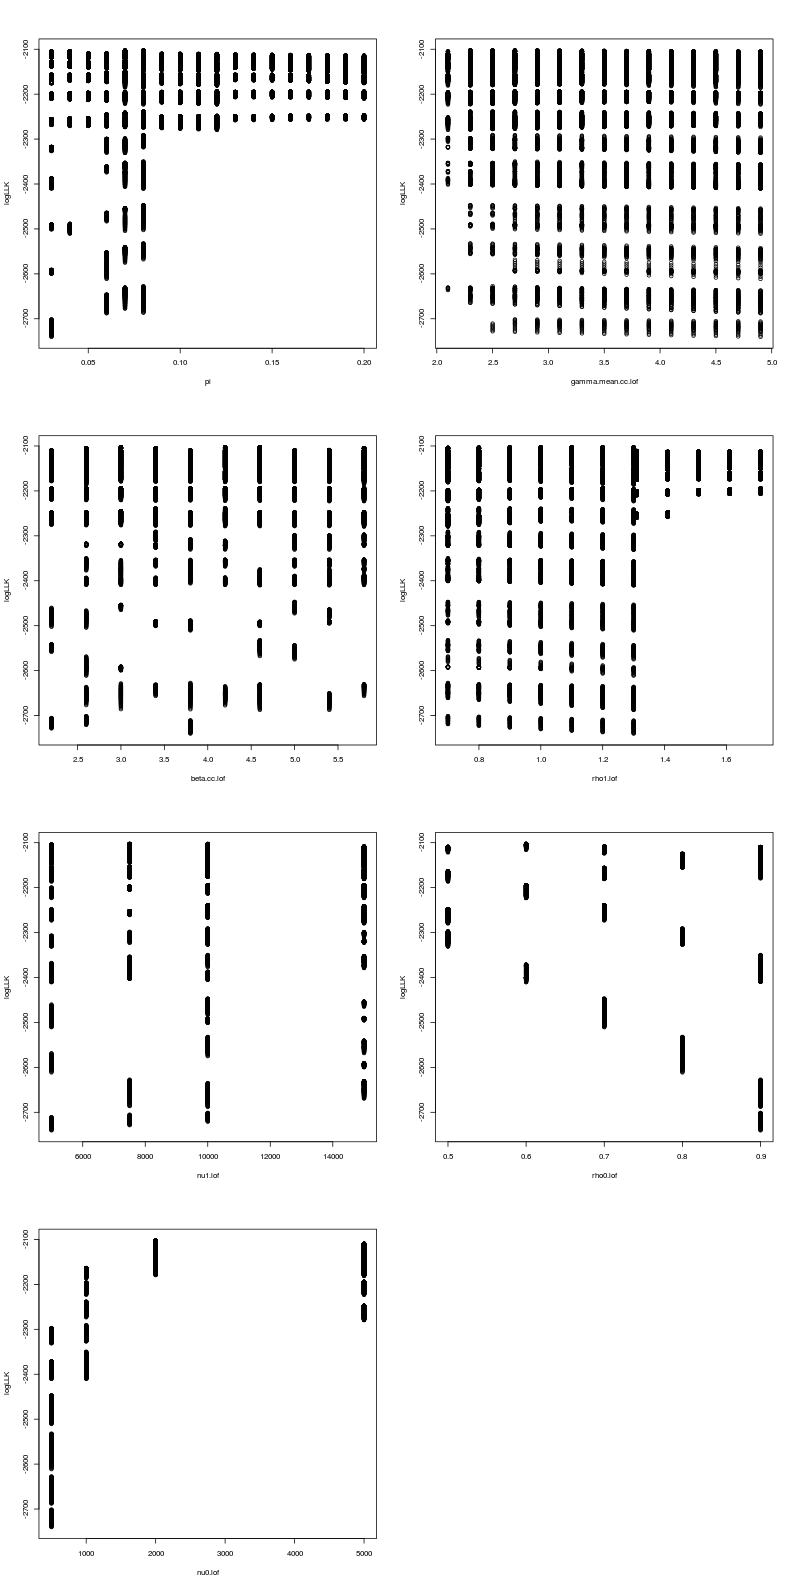

In [273]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

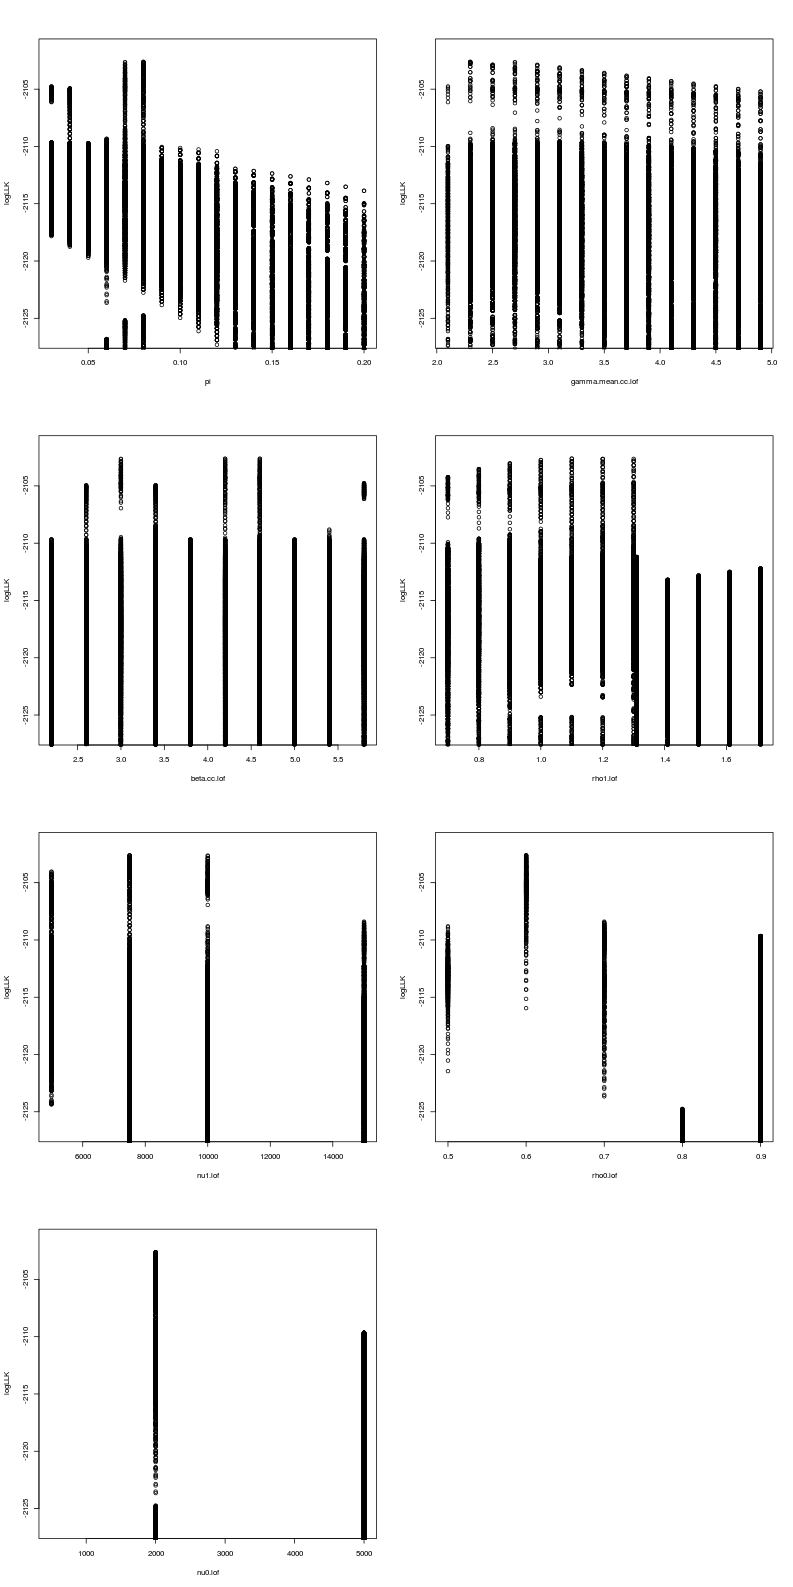

In [274]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 25
d.cc.lof.1 <- d.cc.lof.1[V8>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [275]:
%%R
head(d.cc.lof.1[order(V8)], 40)


      V1  V2  V3  V4    V5  V6   V7       V8
 1: 0.08 2.3 4.2 1.1  7500 0.6 2000 2102.615
 2: 0.08 2.3 4.6 1.1  7500 0.6 2000 2102.616
 3: 0.07 2.7 3.0 1.3 10000 0.6 2000 2102.635
 4: 0.08 2.3 4.2 1.2  7500 0.6 2000 2102.639
 5: 0.08 2.3 4.6 1.2  7500 0.6 2000 2102.644
 6: 0.07 2.7 3.0 1.2 10000 0.6 2000 2102.678
 7: 0.08 2.3 4.6 1.0  7500 0.6 2000 2102.737
 8: 0.08 2.3 4.2 1.0  7500 0.6 2000 2102.739
 9: 0.08 2.3 4.2 1.3  7500 0.6 2000 2102.793
10: 0.08 2.3 4.6 1.3  7500 0.6 2000 2102.801
11: 0.07 2.7 3.0 1.1 10000 0.6 2000 2102.830
12: 0.08 2.5 4.2 1.1  7500 0.6 2000 2102.865
13: 0.08 2.5 4.6 1.1  7500 0.6 2000 2102.868
14: 0.07 2.9 3.0 1.2 10000 0.6 2000 2102.873
15: 0.07 2.9 3.0 1.3 10000 0.6 2000 2102.890
16: 0.08 2.5 4.6 1.0  7500 0.6 2000 2102.912
17: 0.08 2.5 4.2 1.0  7500 0.6 2000 2102.912
18: 0.07 2.9 3.0 1.1 10000 0.6 2000 2102.965
19: 0.08 2.5 4.2 1.2  7500 0.6 2000 2102.969
20: 0.08 2.5 4.6 1.2  7500 0.6 2000 2102.975
21: 0.08 2.3 4.6 0.9  7500 0.6 2000 2103.029
22: 0.08 2

In [276]:
#!gist -p Test_grid_cc_using_rho1_and_rho1_fromTADApaper_genesetFMRP.ipynb

In [277]:
!gist -u https://gist.github.com/7d2c438d8bc416dbf815 Test_grid_cc_using_rho1_and_rho1_fromTADApaper_genesetFMRP.ipynb

https://gist.github.com/7d2c438d8bc416dbf815
